## Read me 
This notebook contains a script to read and plot the amplitude data for the three codes:
1. WavesWater.c
2. ViscousOilOnWater.c
3. IceOnWaterWaves.

## Packages and Functions

In [1]:
#Import relevant packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Use Latex and serif font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#Reads data from a file and separates columns into variables of time and Amplitude
def read_extract(dat_file):
    df = pd.read_csv(dat_file, sep=' ')
    df.head()
    nb_col = len(df.columns)
    
    if (nb_col==2):
        t = df.iloc[:, 0].to_numpy()
        Amp = df.iloc[:, 1].to_numpy()
        A0 = Amp[0]
        return A0, t, Amp
    
    else :
        t = df.iloc[:, 0].to_numpy()
        AmpOcean = df.iloc[:, 1].to_numpy()
        AmpIce = df.iloc[:, 2].to_numpy()
        A0_Ocean = AmpOcean[0]
        A0_Ice = AmpIce[0]
        return A0_Ocean, A0_Ice, t, AmpOcean, AmpIce

## Amplitude of single interface problem and comparison with Basilisk code 
plots the amplitude of an interface between air and ocean (WavesWater.c), and compares the amplitude with the basilisk code (gravity.c)

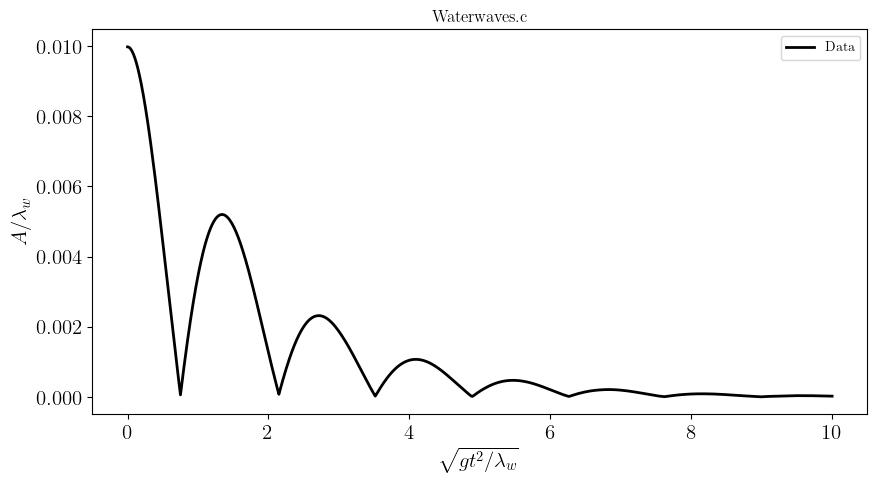

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


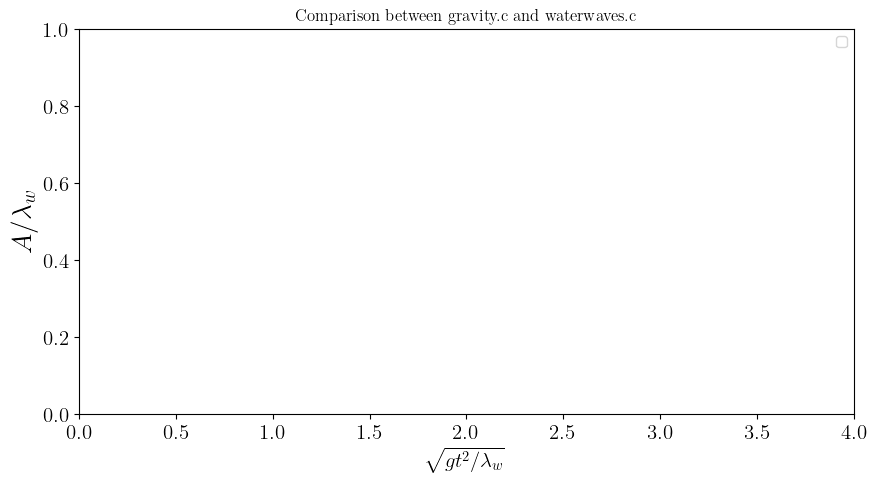

In [4]:
#Import data from Waterwaves.c and gravity.c
A0, t, Amp = read_extract('WavesWater_/1000/amplitude.dat')
#A0_ref, t_ref, Amp_ref = read_extract('amplitude.dat')

df = pd.read_csv('Prosperetti.dat', sep=' ')
t_Prosp = df.iloc[:, 1].to_numpy()
Amp_Prosp = df.iloc[:, 3].to_numpy()


#Amplitude of interface between air and ocean
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(t, Amp, 'k-', lw=2, label='Data')
ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlim([0., 4.0])
#ax.set_ylim([0., A0])
ax.legend()
plt.title("Waterwaves.c")
#plt.savefig("Amp_w")
plt.show()


#Comparison between amplitude of our code and reference code
fig, ax = plt.subplots(1, 1, figsize=(10,5))
#ax.plot(t_ref, Amp_ref, 'r', lw=2, label='Reference Data')
#ax.plot(t_Prosp/16.032448313657, Amp_Prosp, 'b', lw=2, label='Reference Prosperetti Data')
#ax.plot(t, Amp, 'k-', lw=2, label='Data')
ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$A/\lambda_w$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)#
ax.set_xlim([0., 4.0])
#ax.set_ylim([0., A0])
ax.legend()
plt.title("Comparison between gravity.c and waterwaves.c")
#plt.savefig("Comparison_gw_grid6_N128")
plt.show()

## Comparing the amplitudes of the viscous layer
Using code from the ice as a purely viscous layer, I'm plotting the amplitude for both interfaces of the ice shelf for different mu_IceOcean, Ga, grid level. 
Changing mu_IceOcean means that i'm changing the viscosity of the ice layer whilst keeping the viscosity of water and air the same, whereas changing Ga translates to changing the viscosity of all three layers but keeping their relative viscosities the same. 

### mu_IceOcean

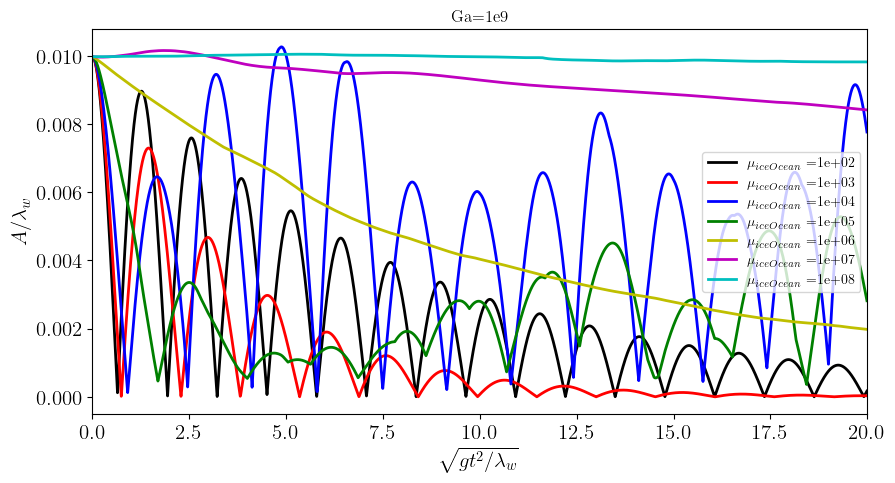

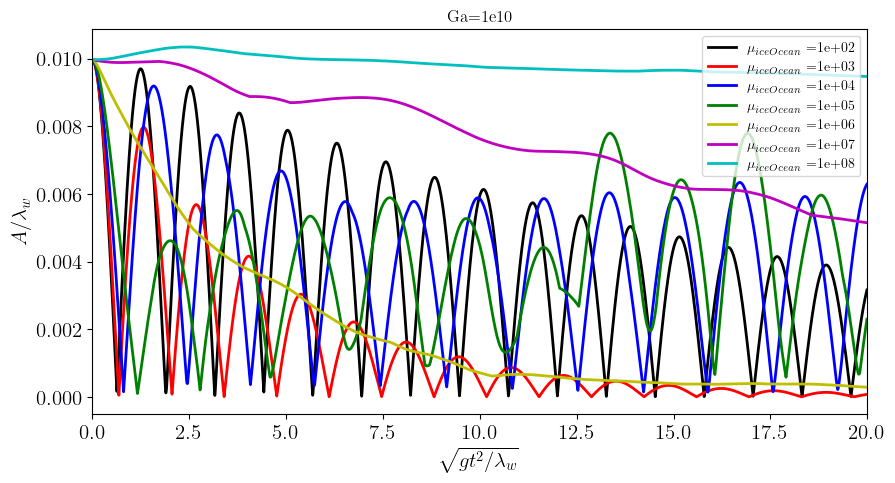

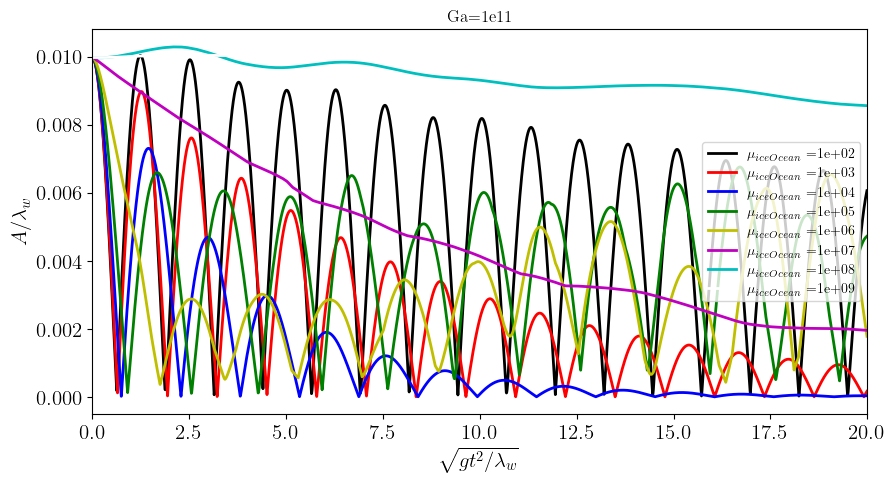

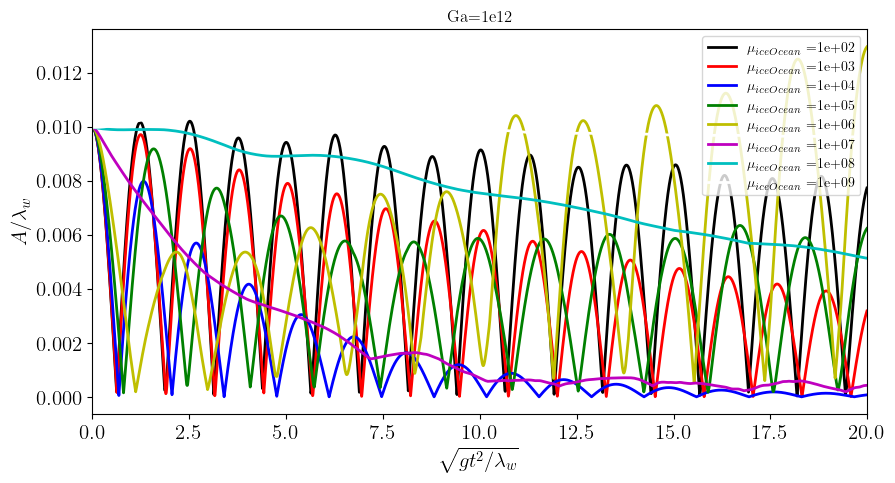

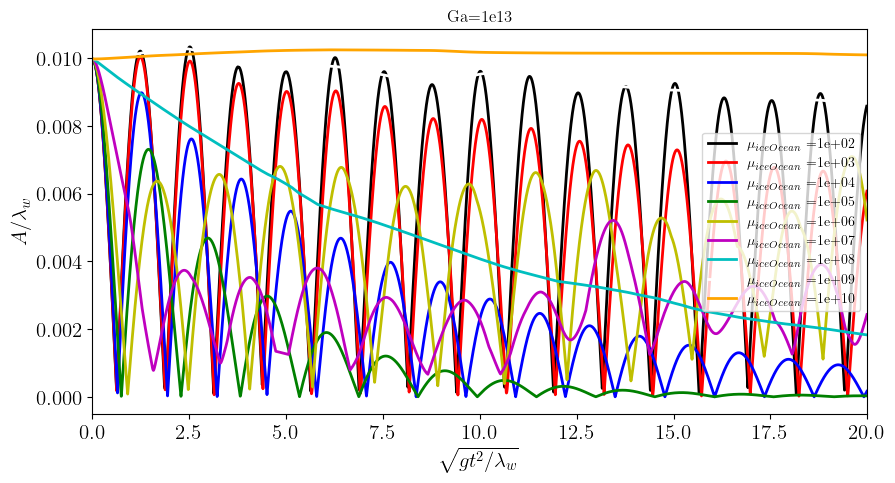

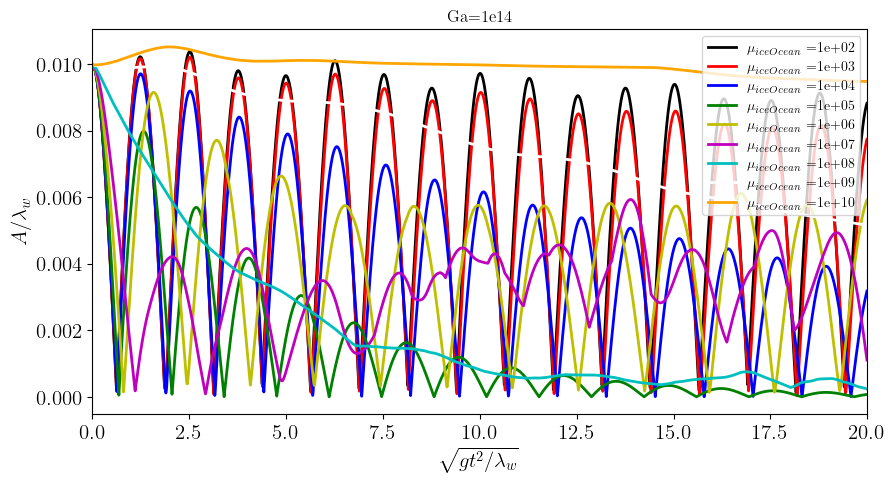

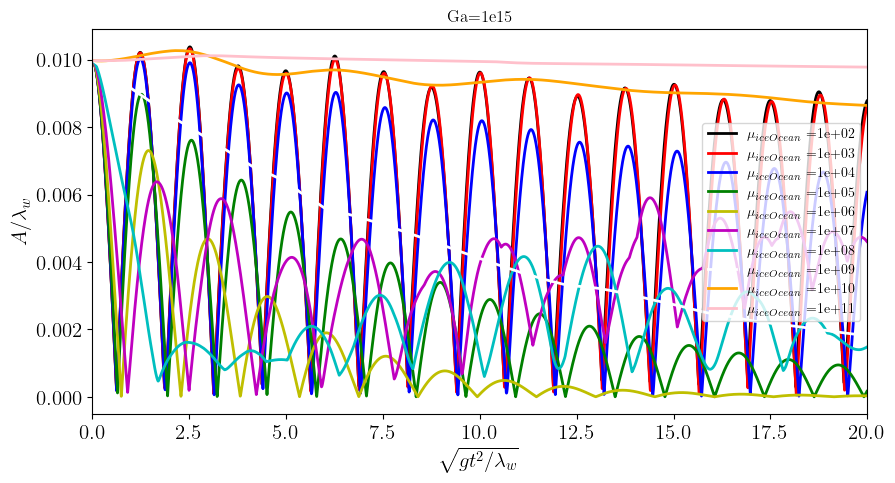

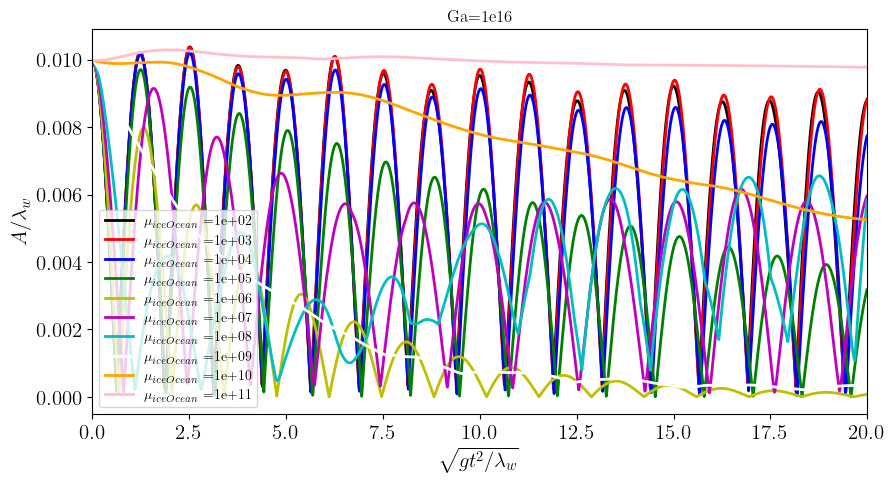

In [165]:
#Initialize variables 
mu_iceOcean = [1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15]
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']

#Function that extracts Amplitude data from ViscousOilonWaterWaves.c, numbered folders, and plots the 
#amplitude of both interfaces as a function of time for different mu_IceOcean
def plot_mu (i0,iN,string):
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    for i in range(i0,iN+1):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{i}/amplitude.dat')
        #ax.plot(t, AmpOcean, colors[i-2036], lw=2, label='mu_iceOcean ='+str(mu_iceOcean[i-2036]))
        ax.plot(t, AmpIce, colors[i-i0], lw=2, label='$\mu_{iceOcean}$ =' + '{:.0e}'.format(mu_iceOcean[i-i0]))
        ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
        ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_xlim([0., 20])
        #ax.set_ylim([0., A0_Ice])
        ax.legend()
    plt.title(string)
    plt.savefig(string)
    plt.show()

#plots for various values of Ga
plot_mu(2047,2053,"Ga=1e9")  #for the values of 55-57, either jumps configuration or Amplitude shoots off too large value 
plot_mu(2058,2064,"Ga=1e10") #for the values of 65-68,
plot_mu(2069,2076,"Ga=1e11") #for the values of 78, 
plot_mu(2080,2087,"Ga=1e12") #for the values of 89-93, 
plot_mu(2094,2102,"Ga=1e13") #for the values of 104-107, 
plot_mu(2108,2116,"Ga=1e14") #for the values of 118-121, 
plot_mu(2122,2131,"Ga=1e15") #for the values of 133-135, 
plot_mu(2136,2145,"Ga=1e16") #for the values of 147-149, 

### Ga

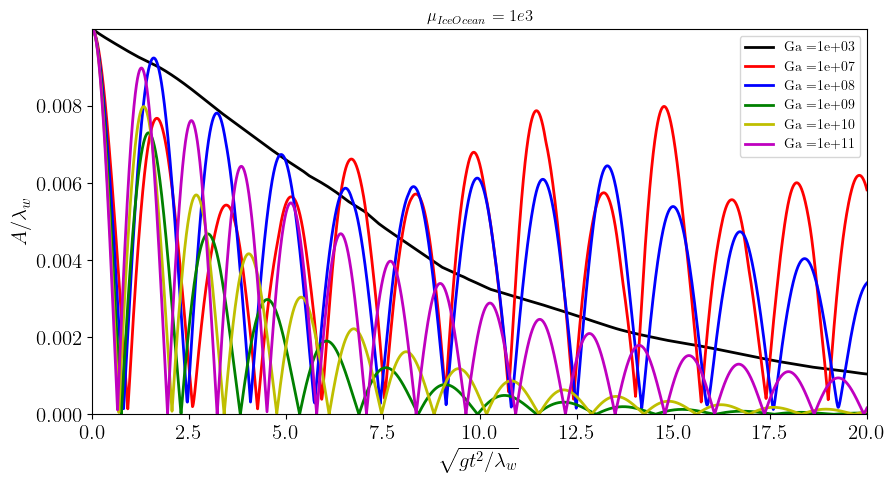

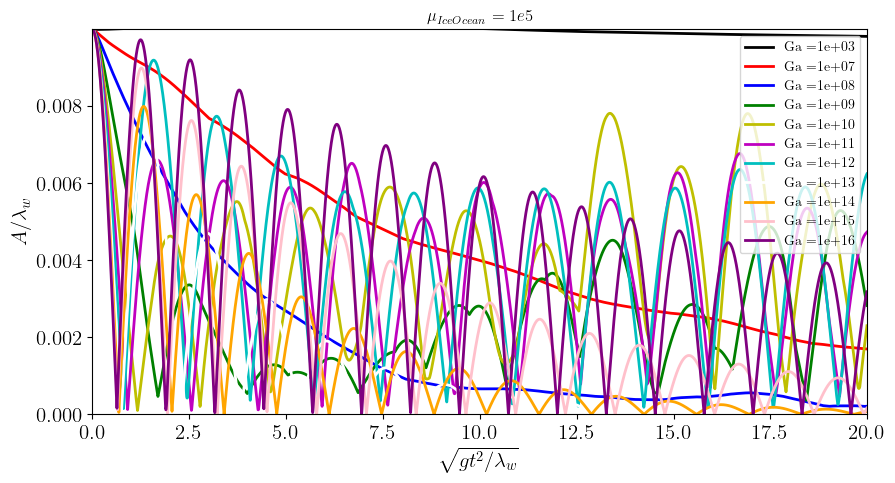

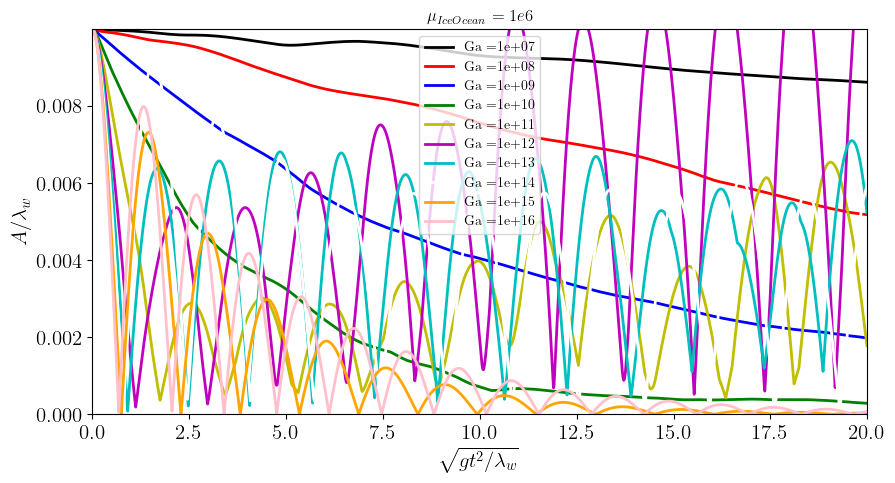

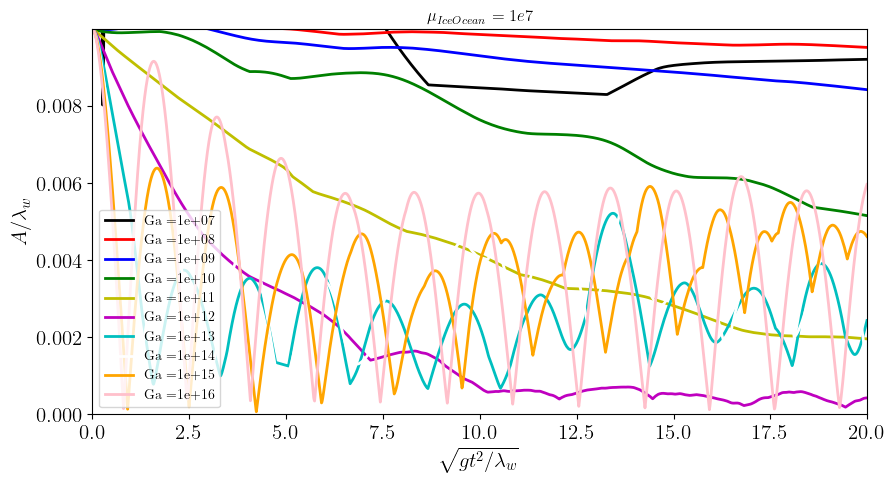

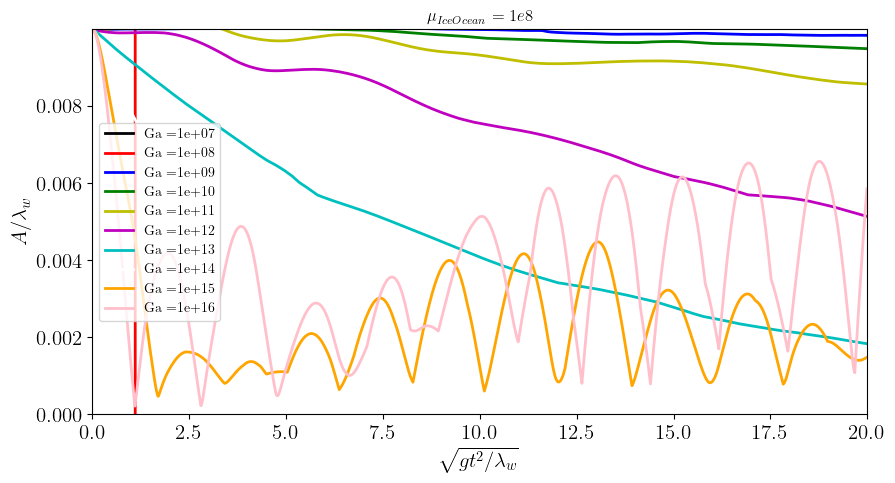

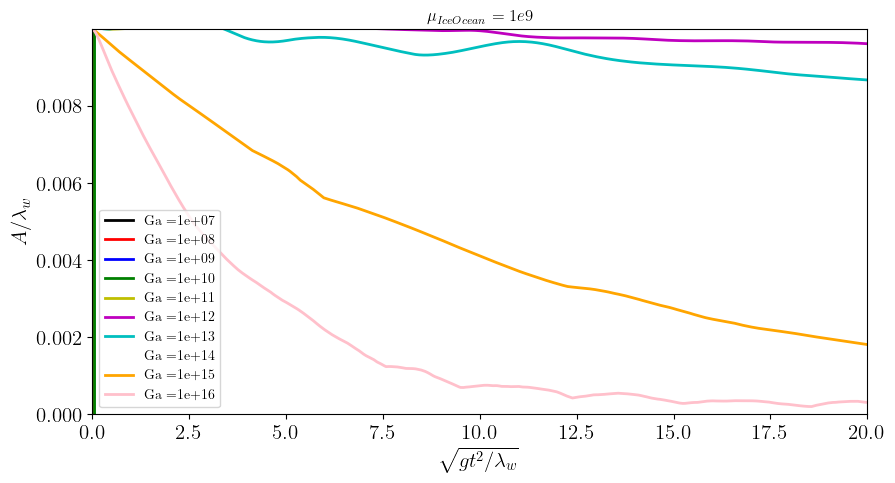

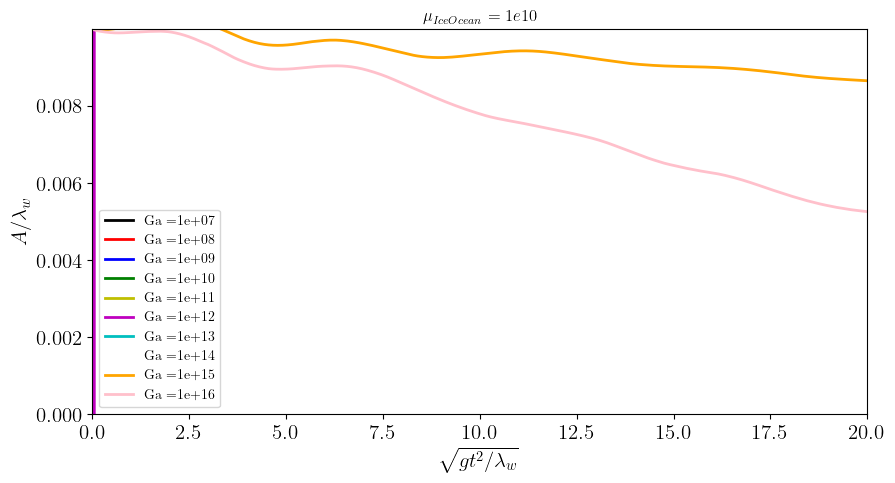

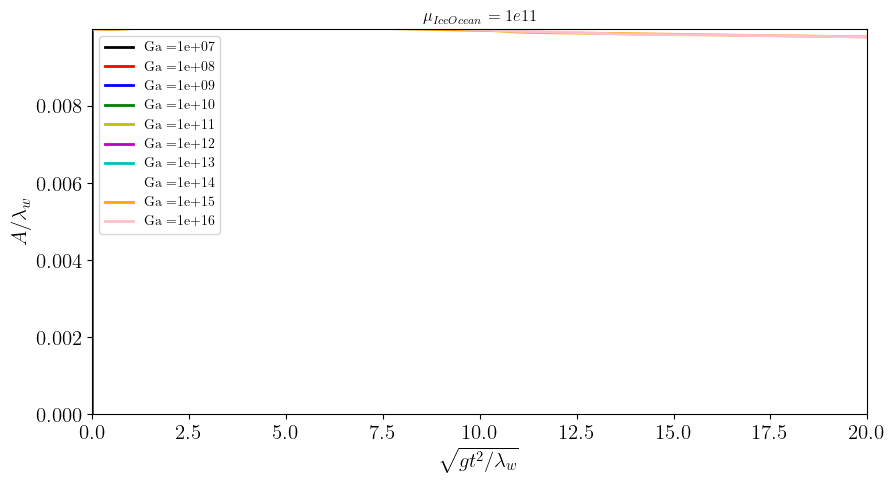

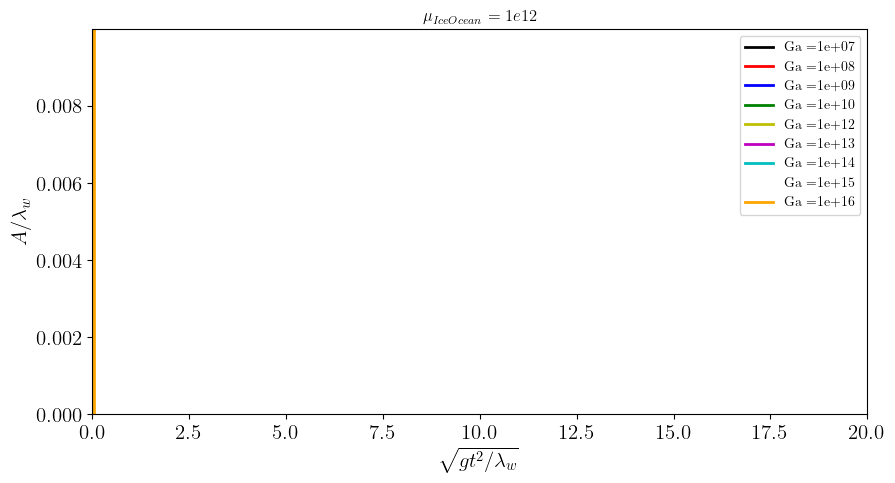

In [167]:
#Initialize variables
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']

#Function that extracts Amplitude data from ViscousOilonWaterWaves.c, numbered folders, and plots the 
#amplitude of both interfaces as a function of time for different Ga
def plot_Ga (Ga,folders,string):
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    for i in range(len(folders)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folders[i]}/amplitude.dat')
        #ax.plot(t, AmpOcean, colors[i], lw=2, label='Ga ='+str(Ga[i]))
        ax.plot(t, AmpIce, colors[i], lw=2, label='Ga =' + '{:.0e}'.format(Ga[i]))
        ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
        ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_xlim([0., 20])
        ax.set_ylim([0., A0_Ice])
        ax.legend()
    plt.title(string)
    plt.savefig(string)
    plt.show()

#mu = 1e3
Ga = [1e3, 1e7, 1e8, 1e9, 1e10, 1e11]
folder = [2004, 2026, 2037, 2048, 2059, 2070] # !!!! you need to give this to every function 
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e3$")

#mu = 1e5 
Ga = [1e3, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2006,2028,2039,2050,2061,2072,2083,2097,2111,2125,2139]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e5$")

#mu = 1e6
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2029,2040,2051,2062,2073,2084,2098,2112,2126,2140]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e6$")

#mu = 1e7
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2030,2041,2052,2063,2074,2085,2099,2113,2127,2141]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e7$")

#mu = 1e8
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2031,2042,2053,2064,2075,2086,2100,2114,2128,2142]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e8$")

#mu = 1e9
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2032,2043,2054,2065,2076,2087,2101,2115,2129,2143]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e9$")

#mu = 1e10
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2033,2044,2055,2066,2077,2088,2102,2116,2130,2144]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e10$")

#mu = 1e11
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2034,2045,2056,2067,2078,2089,2103,2117,2131,2145]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e11$")

#mu = 1e12
Ga = [1e7, 1e8, 1e9, 1e10, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2035,2046,2057,2068,2090,2104,2118,2132,2146]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e12$")

### Grid

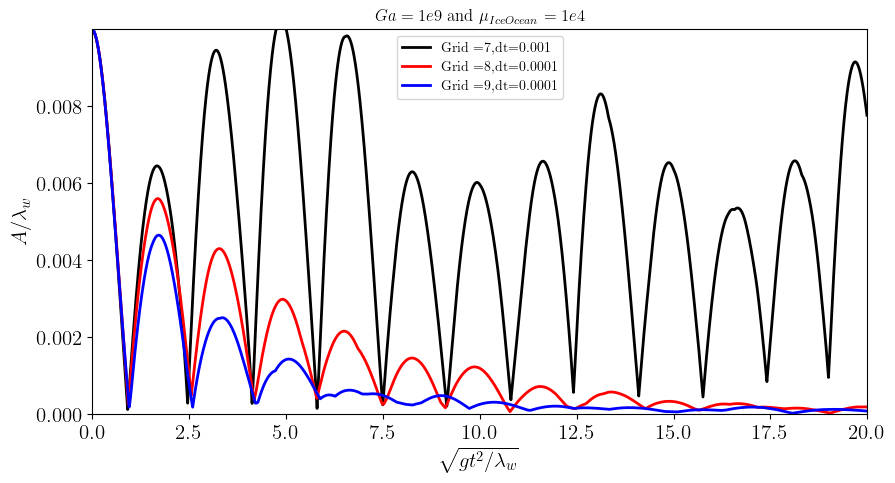

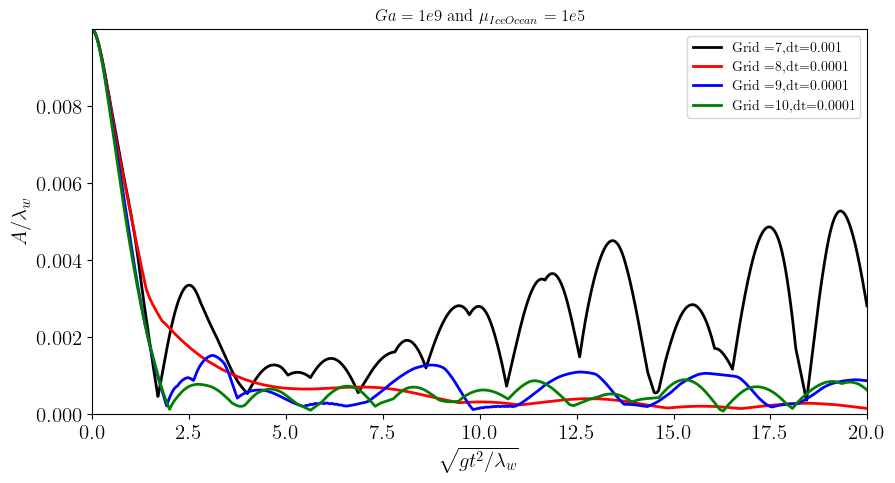

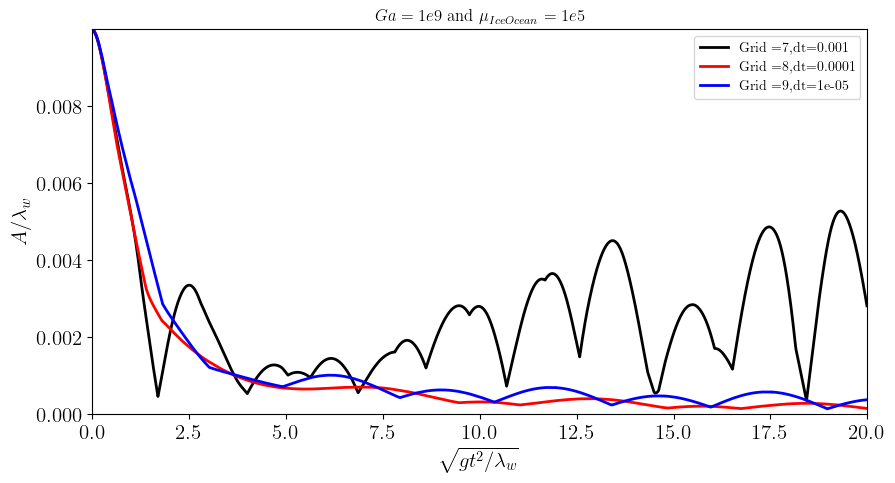

In [169]:
#Initialize variables
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']

#plot Grid level
folders = [2049, 2150, 2151]  # Example file_index list
grid= [7,8,9]
dt = [1e-3,1e-4,1e-4]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for i in range(len(folders)):
    A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folders[i]}/amplitude.dat')
    #ax.plot(t, AmpOcean, colors[i], lw=2, label='Grid ='+str(grid[i]))
    ax.plot(t, AmpIce, colors[i], lw=2, label='Grid =' + format(grid[i])+',dt='+format(dt[i]))
    ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
    ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlim([0., 20])
    ax.set_ylim([0., A0_Ice])
    ax.legend()
plt.title("$Ga=1e9$ and $\mu_{IceOcean}=1e4$")
plt.savefig("$Ga=1e9$ and $\mu_{IceOcean}=1e4$")
plt.show()

folders = [2050, 2152, 2153,2154]  # Example file_index list
grid= [7,8,9,10]
dt = [1e-3,1e-4,1e-4,1e-4]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for i in range(len(folders)):
    A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folders[i]}/amplitude.dat')
    #ax.plot(t, AmpOcean, colors[i], lw=2, label='Grid ='+str(grid[i]))
    ax.plot(t, AmpIce, colors[i], lw=2, label='Grid =' + format(grid[i])+',dt='+format(dt[i]))
    ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
    ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlim([0., 20])
    ax.set_ylim([0., A0_Ice])
    ax.legend()
plt.title("$Ga=1e9$ and $\mu_{IceOcean}=1e5$")
#plt.savefig("$Ga=1e9$ and $\mu_{IceOcean}=1e5$")
plt.show()

folders = [2050, 2152, 2156]  # Example file_index list
grid= [7,8,9]
dt = [1e-3,1e-4,1e-5]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for i in range(len(folders)):
    A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folders[i]}/amplitude.dat')
    #ax.plot(t, AmpOcean, colors[i], lw=2, label='Grid ='+str(grid[i]))
    ax.plot(t, AmpIce, colors[i], lw=2, label='Grid =' + format(grid[i])+',dt='+format(dt[i]))
    ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
    ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlim([0., 20])
    ax.set_ylim([0., A0_Ice])
    ax.legend()
plt.title("$Ga=1e9$ and $\mu_{IceOcean}=1e5$")
#plt.savefig("$Ga=1e9$ and $\mu_{IceOcean}=1e5$")
plt.show()


## Verifying if the ice sheet behaves as an elastic sheet
 I'm testing to see if the implementation of the elastic modulus is done correctly, to see if the sheet behaves elastically.

In [ ]:
#Extracts amplitude data from IceOnWaterWaves.c
A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract('IceOnWaterWaves_/amplitude.dat')


#Plot
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(t, AmpOcean, 'k--', lw=2, label='Ocean layer')
ax.plot(t, AmpIce, 'r--', lw=2, label='Ice layer') 

ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim([0., 10])
#ax.set_ylim([0., A0])
ax.legend()
#plt.savefig("Oil layer Amplitude")
plt.show()

#1. WARNING: CFL must be <= 0.5 for VOF (cfl - 0.5 = 0.00345565), problem with VOF according to code.
#2. Determine if elastic implementation idea is faulty or if there is just some silly bug in the code. 